In [1]:
pip install xgboost


Training Set Evaluation Metrics:
MSE: 0.000000382
RMSE: 0.0006
MAE: 0.0005
R-squared: 1.0000

Validation Set Evaluation Metrics:
MSE: 0.0008
RMSE: 0.0287
MAE: 0.0158
R-squared: 0.9238

Test Set Evaluation Metrics:
MSE: 0.0008
RMSE: 0.0277
MAE: 0.0169
R-squared: 0.9445


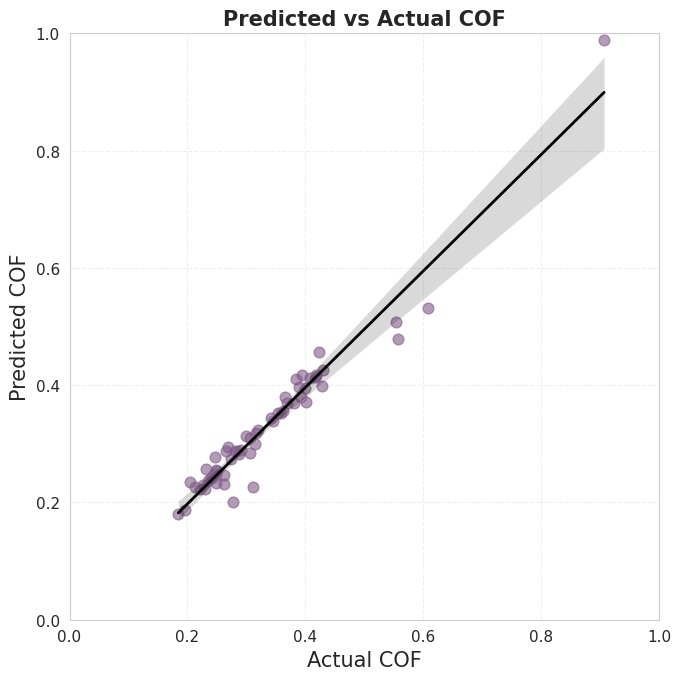

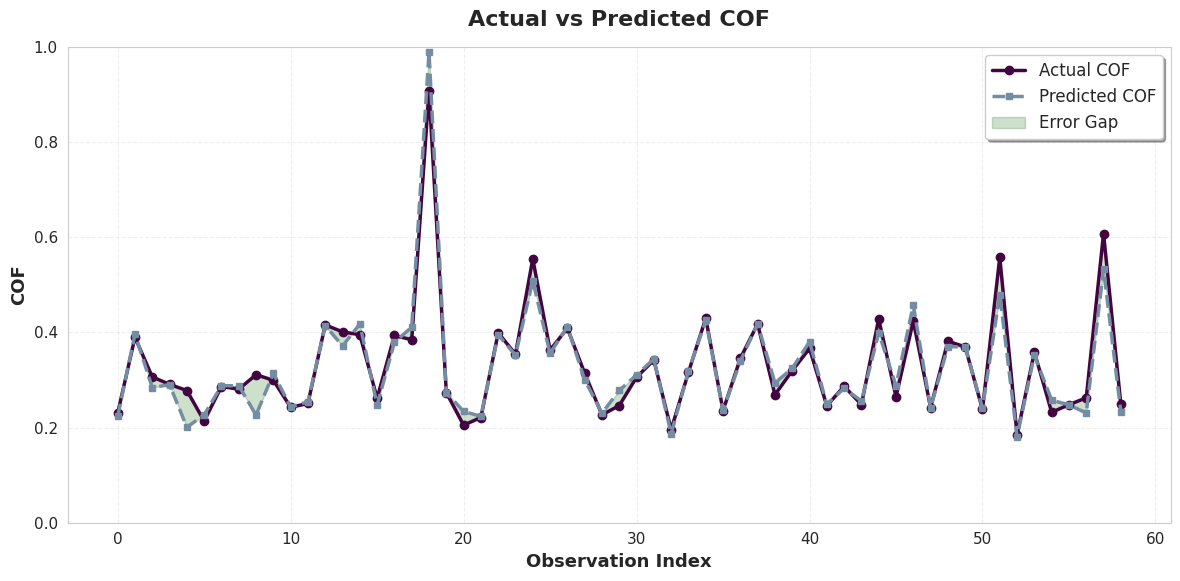

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('CoF.xlsx')
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Separate features and target
X_train = train_df.drop(columns=['COF'])
y_train = train_df['COF']
X_val = val_df.drop(columns=['COF'])
y_val = val_df['COF']
X_test = test_df.drop(columns=['COF'])
y_test = test_df['COF']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(
        n_estimators=900,
        learning_rate= 1.0,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
print("Training Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.9f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.4f}\n")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
print("Validation Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"R-squared: {r2_score(y_val, y_val_pred):.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
print("Test Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# -------------------- Visualization Settings --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# -------------------- Plot 1: Predicted vs Actual --------------------
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#805B87'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual COF")
plt.ylabel("Predicted COF")
plt.title("Predicted vs Actual COF", fontsize=15, weight='bold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------- Plot 2: Observation Line Plot --------------------
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual COF",
    marker='o', markersize=6, linewidth=2.5,
    color='#430541'
)

plt.plot(
    obs_index, y_pred,
    label="Predicted COF",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#758DA3'
)

plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("COF", fontsize=13, weight='bold')
plt.title("Actual vs Predicted COF", fontsize=16, weight='bold', pad=15)
plt.ylim(0, 1)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Training Set Evaluation Metrics:
MSE: 0.00000032
RMSE: 0.00057000
MAE: 0.00041470
R² Score: 0.9980
Validation Set Evaluation Metrics:
MSE: 0.000003
RMSE: 0.0017
MAE: 0.0012
R² Score: 0.9804


Test Set Evaluation Metrics:
MSE: 0.00000272
RMSE: 0.00164942
MAE: 0.00121655
R² Score: 0.9829


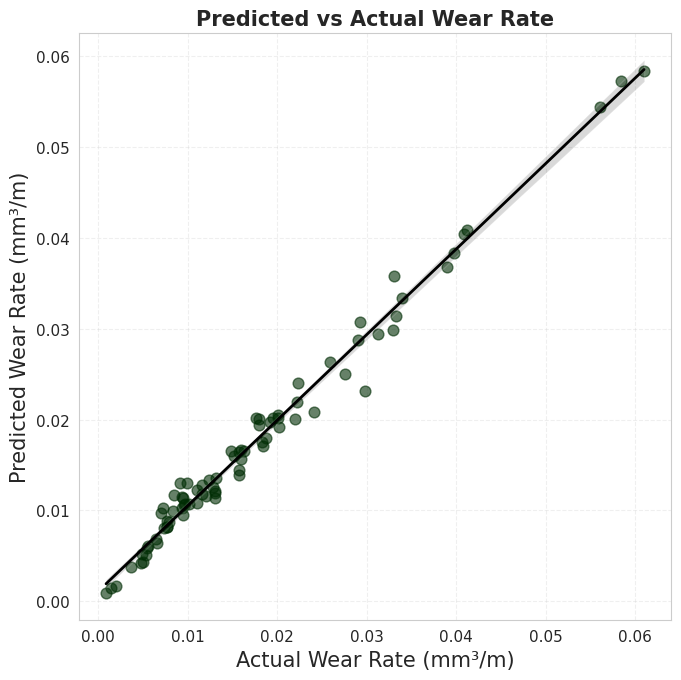

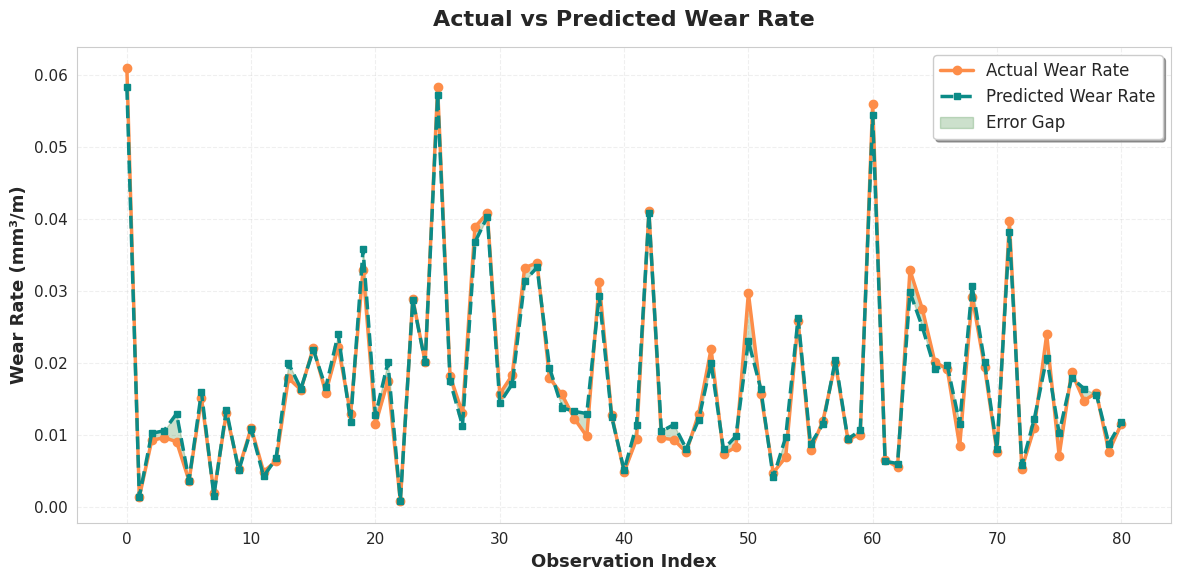

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('Wear_rate.xlsx')  # Adjust path if necessary
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Define features and target
X_train = train_df.drop(columns=['Wear rate (mm3/m)'])
y_train = train_df['Wear rate (mm3/m)']
X_val = val_df.drop(columns=['Wear rate (mm3/m)'])
y_val = val_df['Wear rate (mm3/m)']
X_test = test_df.drop(columns=['Wear rate (mm3/m)'])
y_test = test_df['Wear rate (mm3/m)']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    ))
])
pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Evaluation Metrics:")
print(f"MSE: {train_mse:.8f}")
print(f"RMSE: {train_rmse:.8f}")
print(f"MAE: {train_mae:.8f}")
print(f"R² Score: {train_r2:.4f}")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation Metrics:")
print(f"MSE: {val_mse:.6f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R² Score: {val_r2:.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation Metrics:")
print(f"MSE: {mse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"MAE: {mae:.8f}")
print(f"R² Score: {r2:.4f}")

# -------------------- Visualization --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# ---- Plot 1: Predicted vs Actual ----
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#002D04'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual Wear Rate (mm³/m)")
plt.ylabel("Predicted Wear Rate (mm³/m)")
plt.title("Predicted vs Actual Wear Rate", fontsize=15, weight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Plot 2: Line Plot of Observations ----
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual Wear Rate",
    marker='o', markersize=6, linewidth=2.5,
    color='#Fd8D49'
)
plt.plot(
    obs_index, y_pred,
    label="Predicted Wear Rate",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#0B8B87'
)
plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("Wear Rate (mm³/m)", fontsize=13, weight='bold')
plt.title("Actual vs Predicted Wear Rate", fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
